In [371]:
# ! pip install yfinance

In [372]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from copy import copy

In [373]:
nifty50_index_symbol = '^NSEI'

start_date = '2010-01-01'
end_date = '2019-06-30'

data = yf.download(nifty50_index_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [374]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,7561.167236,7598.586197,7512.571021,7555.766634,7555.766634,136968.849634
std,2084.658066,2086.080772,2077.707855,2081.917797,2081.917797,117889.153660
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000
25%,5633.799805,5659.850098,5586.450195,5627.750000,5627.750000,0.000000
50%,7630.250000,7673.700195,7579.299805,7614.350098,7614.350098,148800.000000
75%,8914.500000,8957.049805,8867.599609,8914.299805,8914.299805,200900.000000
max,12052.650391,12103.049805,12005.849609,12088.549805,12088.549805,719000.000000


In [375]:
def normalisation(col):
    new_col = (col - min(col))/(max(col) - min(col)) + 0.01  # for non zero stock prices
    return new_col

In [376]:
df = data[['Close', 'Volume']]

In [377]:
for col in df.columns:
    df[col] = normalisation(df[col])

/var/folders/41/13h1j2zj3plb9jjbs7dzx75c0000gn/T/ipykernel_60575/514820066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = normalisation(df[col])
/var/folders/41/13h1j2zj3plb9jjbs7dzx75c0000gn/T/ipykernel_60575/514820066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = normalisation(df[col])


In [378]:
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

for i in range(1, 26):
    df[f'Close_Lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

/var/folders/41/13h1j2zj3plb9jjbs7dzx75c0000gn/T/ipykernel_60575/860919714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
/var/folders/41/13h1j2zj3plb9jjbs7dzx75c0000gn/T/ipykernel_60575/860919714.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close_Lag_{i}'] = df['Close'].shift(i)
/var/folders/41/13h1j2zj3plb9jjbs7dzx75c0000gn/T/ipykernel_60575/860919714.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [379]:
df[:600]

,Close,Volume,RSI,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Close_Lag_6,Close_Lag_7,...,Close_Lag_16,Close_Lag_17,Close_Lag_18,Close_Lag_19,Close_Lag_20,Close_Lag_21,Close_Lag_22,Close_Lag_23,Close_Lag_24,Close_Lag_25
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-09,0.042932,0.01,25.333263,0.038657,0.033123,0.049917,0.061383,0.047896,0.057121,0.054782,...,0.103845,0.104866,0.101426,0.098304,0.103474,0.102858,0.105290,0.107768,0.107252,0.101194
2010-02-10,0.038233,0.01,24.455571,0.042932,0.038657,0.033123,0.049917,0.061383,0.047896,0.057121,...,0.106847,0.103845,0.104866,0.101426,0.098304,0.103474,0.102858,0.105290,0.107768,0.107252
2010-02-11,0.047465,0.01,34.300489,0.038233,0.042932,0.038657,0.033123,0.049917,0.061383,0.047896,...,0.100326,0.106847,0.103845,0.104866,0.101426,0.098304,0.103474,0.102858,0.105290,0.107768
2010-02-15,0.044165,0.01,35.694648,0.047465,0.038233,0.042932,0.038657,0.033123,0.049917,0.061383,...,0.099802,0.100326,0.106847,0.103845,0.104866,0.101426,0.098304,0.103474,0.102858,0.105290
2010-02-16,0.051296,0.01,40.983704,0.044165,0.047465,0.038233,0.042932,0.038657,0.033123,0.049917,...,0.082896,0.099802,0.100326,0.106847,0.103845,0.104866,0.101426,0.098304,0.103474,0.102858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-10,0.116192,0.01,76.115282,0.106887,0.112428,0.113799,0.110519,0.108584,0.107344,0.107384,...,0.078932,0.088847,0.077673,0.086514,0.085779,0.077587,0.079476,0.076997,0.070032,0.052297
2012-07-11,0.111016,0.01,66.623506,0.116192,0.106887,0.112428,0.113799,0.110519,0.108584,0.107344,...,0.084181,0.078932,0.088847,0.077673,0.086514,0.085779,0.077587,0.079476,0.076997,0.070032
2012-07-12,0.101598,0.01,59.348173,0.111016,0.116192,0.106887,0.112428,0.113799,0.110519,0.108584,...,0.086395,0.084181,0.078932,0.088847,0.077673,0.086514,0.085779,0.077587,0.079476,0.076997


In [380]:
data_arr = df[:600].to_numpy()

In [381]:
data_arr.shape

(600, 28)

In [382]:
data_arr = data_arr[:600]

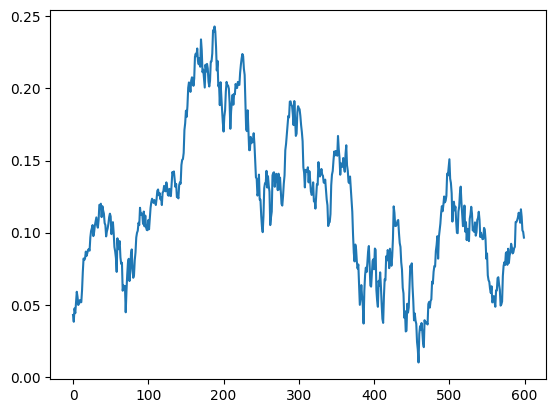

In [383]:
plt.plot(data_arr[:, 0])

In [384]:
class StockMarketEnvironment:
    # action == 0-buy, 1-sell, 2-hold
    def __init__(self, starting_balance, data):
        self.data = data
        self.starting_balance = starting_balance
        self.balance = starting_balance
        self.stocks = 0
        self.portfolio = self.balance
        self.time_step = 0
        self.end = False
        self.state = np.hstack((self.data[self.time_step], self.balance, self.stocks))

    
    def reset(self):
        self.balance = self.starting_balance
        self.stocks = 0
        self.portfolio = self.balance
        self.time_step = 0
        self.end = False
        self.state = np.hstack((self.data[self.time_step], self.balance, self.stocks))

    def step(self, action):
        curr_state = self.state
        previous_portfolio = self.portfolio
        rew_up = 0

        # Process action: buy, sell, hold
        if action >= 0 and action < 0.5:
            # Buy
            num_poss_buy = self.balance / curr_state[0]
            buy = num_poss_buy * abs(action - 0.5) * 2
            self.stocks += buy
            self.balance -= buy * curr_state[0]
            if buy == 0:
                rew_up = 1
        elif action > 0.5 and action <= 1:
            # Sell
            num_poss_sell = self.stocks
            sell = num_poss_sell * abs(action - 0.5) * 2
            self.stocks -= sell
            self.balance += sell * curr_state[0]
            if sell == 0:
                rew_up = 1

        next_time_state = self.time_step + 1
        if next_time_state >= self.data.shape[0] - 1:
            self.end = True
        next_state = np.hstack((self.data[next_time_state], self.balance, self.stocks))

        self.portfolio = self.balance + self.stocks * curr_state[0]
        next_portfolio = self.balance + self.stocks * next_state[0]
        reward = (next_portfolio - previous_portfolio) / (previous_portfolio + 1)

        if next_portfolio < self.portfolio:
            reward -= 0.5 * (self.portfolio - next_portfolio) / (self.portfolio + 1)

        if self.balance > 0.8 * self.portfolio:
            reward -= 0.01
        
        if rew_up == 1:
            reward -= 0.1
        else:
            if next_portfolio > self.portfolio:
                reward += 2 * ((next_portfolio - previous_portfolio) / (previous_portfolio + 1))

        self.state = next_state
        self.time_step += 1

        reward = np.tanh(reward)

        return (self.state, reward, self.end)

    
    def is_end(self):
        return self.end

In [385]:
def get_actor():
    inputs = tf.keras.layers.Input(shape = (30, ))
    out = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
    out = tf.keras.layers.Dense(64, activation = 'relu')(out)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(out)
    model = tf.keras.Model(inputs, outputs)
    return model

def get_critic():
    state_input = tf.keras.layers.Input(shape = (30, ))
    out = tf.keras.layers.Dense(64, activation = 'relu')(state_input)
    state_out = tf.keras.layers.Dense(128, activation = 'relu')(out)
    actor_input = tf.keras.layers.Input(shape = (1, ))
    actor_out = tf.keras.layers.Dense(128, activation = 'relu')(actor_input)
    concat = tf.keras.layers.Concatenate()([state_out, actor_out])
    total_out = tf.keras.layers.Dense(512, activation = 'relu')(concat)
    total_out = tf.keras.layers.Dense(512, activation = 'relu')(total_out)
    outputs = tf.keras.layers.Dense(1)(total_out)
    outputs = tf.keras.ops.tanh(outputs)
    model = tf.keras.Model([state_input, actor_input], outputs)
    return model

In [386]:
actor_model = get_actor()
target_actor = copy(actor_model)
critic_model = get_critic()
target_critic = copy(critic_model)

actor_optimizer = tf.keras.optimizers.Adam(0.0002)
critic_optimizer = tf.keras.optimizers.Adam(0.0001)

In [387]:
buffer_size = 400
buffer = []
max_iters = 100
gamma = 0.9
epsilon = 1
eps_decay = 0.95
min_eps = 0.1

In [388]:
data_arr.shape[0]

600

In [389]:
balance = np.mean(data_arr)
env = StockMarketEnvironment(balance, data_arr)

In [390]:
np.array(env.state).shape

(30,)

In [391]:
def update_target(target, original, tau):
    target_weights = target.get_weights()
    original_weights = original.get_weights()

    for i in range(len(target_weights)):
        target_weights[i] = original_weights[i] * tau + target_weights[i] * (1 - tau)

    target.set_weights(target_weights)

In [401]:
critic_loss_history = []
actor_loss_history = []
rewards_history = []
for i in range(max_iters):
    action_count = []
    main_action_count = [0, 0]
    env.reset()
    rewards_sum = 0
    count_explore_exploit = [0, 0]
    while not env.is_end():
        curr_state = env.state
    
        rand_num = np.random.uniform(0, 1)
        if rand_num < epsilon:
            action = 0.5 + np.random.normal(0, 0.3)
            count_explore_exploit[0] += 1
        else:
            action = target_actor.predict(curr_state.reshape((-1, 30)), verbose = 0)
            action = action.item()
            action = action + np.random.normal(0, 0.15)
            count_explore_exploit[1] += 1
        action = np.clip(action, 0, 1)
        action_count.append(action)

        next_state, reward, end = env.step(action)
        rewards_sum += reward

        if action > 0.5:
            main_action_count[1] += 1
        else:
            main_action_count[0] += 1

        quadruple = (curr_state, action, reward, next_state, end)
        buffer.append(quadruple)
        if len(buffer) > buffer_size:
            buffer.pop(0)

    rewards_history.append(rewards_sum)
    
    sample_indices = np.random.choice(len(buffer), size=min(100, len(buffer)), replace=False)
    train_sample = [buffer[idx] for idx in sample_indices]

    epsilon = max(epsilon * eps_decay, min_eps)

    total_critic_loss = 0
    total_actor_loss = 0
    for quadrup in train_sample:
        curr_state, action, reward, next_state, end = quadrup

        # critic taining
        with tf.GradientTape() as tape:
            next_state_action = target_actor(tf.convert_to_tensor(next_state.reshape((-1, 30))), training = True)
            next_state_q_vals = target_critic([tf.convert_to_tensor(next_state.reshape((-1, 30))), next_state_action], training = True)
            target_q_val = reward + gamma * next_state_q_vals
            curr_q_val = critic_model([tf.convert_to_tensor(curr_state.reshape((-1, 30))), tf.convert_to_tensor(np.array(action).reshape((-1, 1)))], training = True)
            critic_loss = tf.square(target_q_val - curr_q_val)
        critic_grads = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(zip(critic_grads, critic_model.trainable_variables))
        total_critic_loss += critic_loss

        #actor training
        with tf.GradientTape() as tape:
            actor_curr_act = actor_model(tf.convert_to_tensor(curr_state.reshape((-1, 30))), training = True)
            actor_curr_q_val = critic_model([tf.convert_to_tensor(curr_state.reshape((-1, 30))), actor_curr_act], training = True)
            actor_loss = -1 * tf.keras.ops.mean(actor_curr_q_val)
        actor_grads = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(zip(actor_grads, actor_model.trainable_variables))
        total_actor_loss += actor_loss

    
    total_critic_loss /= len(train_sample)
    critic_loss_history.append(total_critic_loss)
    total_actor_loss /= len(train_sample)
    actor_loss_history.append(total_actor_loss)

    update_target(target_actor, actor_model, 0.1)
    update_target(target_critic, critic_model, 0.1)
    target_actor.save_weights("actor_trained.weights.h5")
    target_critic.save_weights("critic_trained.weights.h5")

    print(i, "-> CRITIC LOSS:", total_critic_loss.numpy(), "-> ACTOR LOSS:", total_actor_loss.numpy(), "-> REWARD:", rewards_sum, "\n-> Actions:", action_count[:20])
    print("start balance->", env.starting_balance, "portfolio final", env.portfolio, "STOCKS", env.stocks, "CASH", env.balance, "Action Count", main_action_count, "Exploration COUNT", count_explore_exploit)


In [397]:
target_actor.save_weights("best_actor_trained.weights.h5")
target_critic.save_weights("best_critic_trained.weights.h5")

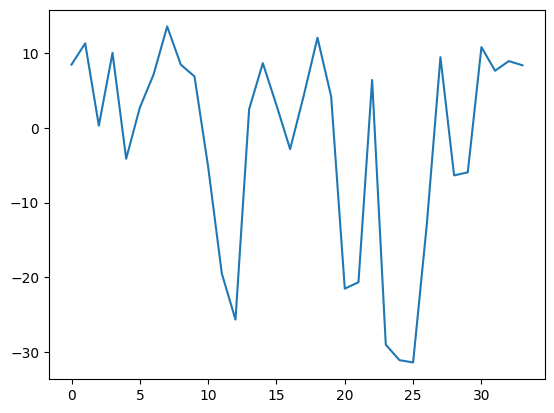

In [398]:
plt.plot(rewards_history)

In [399]:
action_count = []
env.reset()
rewards_sum = 0
stock_history = []
while not env.is_end():
    curr_state = env.state
    action = target_actor.predict(curr_state.reshape((-1, 30)), verbose = 0)
    action = action.item()
    action_count.append(action)
    next_state, reward, end = env.step(action)
    rewards_sum += reward
    stock_history.append(env.stocks)
print(rewards_sum)
print(stock_history)
print(action_count)
buy_sell_hold = [0, 0, 0]
for i in action_count:
    if i > 0.5:
        buy_sell_hold[1] += 1
    if i < 0.5:
        buy_sell_hold[0] += 1
    if i == 0.5:
        buy_sell_hold[2] += 1
print(buy_sell_hold)

6.055695898470668
[23.0671282706006, 0.0021283575631905194, 25.09344326096958, 0.000640153510314434, 25.087641679527103, 0.0013398246136233638, 29.171564092018645, 0.000139100857218466, 27.673170549548214, 0.00037607448609477956, 27.37402190522741, 0.0004111679506380028, 28.64560664831024, 0.0008673648939918621, 25.434475391849652, 0.006897858562048498, 25.185216115349352, 0.009517328153332727, 25.960301084910157, 0.003611525460016196, 25.49650289867059, 0.012735169785671019, 26.1681511714435, 0.008715845867754979, 25.124633745389485, 0.018440767523092205, 24.548084706383662, 0.007868981334620884, 22.838108635597724, 0.01939247224466456, 22.541811933941727, 0.02246762389894741, 23.30834366738265, 0.009124827456911788, 22.019493748462672, 0.027553871378614758, 22.349981639811997, 0.019393624825024602, 22.387395122222053, 0.009396793630759959, 22.730489792197947, 0.008619509700416472, 23.71649487778384, 0.0021091109727429114, 22.37433656416003, 0.0026618943084528723, 23.46335031222532, 0

In [400]:
print(env.starting_balance)
print(env.portfolio)

1.974073862163932
1.3230335993937032
